# **FINAL PROJECT TEKNIK SAMPLING & DATA WRANGLING**

**Anggota Kelompok :**
1. Ghisele Valerin (5052241005)
2. Kiranna Indy (5052241014)
3. Elena Miska (5052241022)
4. Inessa Regina (5052241037)

## **A. Pendahuluan**

### **1. Deskripsi Dataset**

Dataset Hotels ini berisi 58.890 baris dan 32 variabel yang menggambarkan detail pemesanan hotel pada dua jenis properti yaitu City Hotel dan Resort Hotel. Variabel-variabel yang tersedia di datasetnya terdiri dari:

1. Karakteristik tamu, seperti jumlah adults, children, dan babies.
2. Informasi pemesanan, termasuk lead_time, tahun/bulan/tanggal kedatangan, lama menginap, tipe kamar yang dipesan dan yang diberikan, serta metode pembayaran dan kebijakan deposit.
3. Segmentasi pelanggan, seperti market_segment, distribution_channel, customer_type, dan country.
4. Perilaku konsumen, termasuk is_canceled, jumlah perubahan pemesanan, special requests, dan repeat guest.
5. Variabel operasional lain, seperti agen pemesanan (agent) dan perusahaan terkait (company), meskipun keduanya memiliki nilai missing value yang cukup besar, karena tidak semua pemesanan hotel dilakukan melalui agen atau perusahaan.

Kesimpulannya, dataset ini memberikan banyak informasi mengenai proses booking hotel, pola kunjungan tamu, juga potensi isu operasional seperti pembatalan, mismatch kamar, dan variasi harga (ADR).

### **2. Alasan dataset menarik**

Dataset Hotels menjadi dataset menarik untuk di pilih dan dianalisis karena dari dataset ini banyak pertanyaan analitis yang bisa dieksplorasi, mulai dari tren musiman, faktor pembatalan, sampai kemampuan hotel untuk memberikan kamar yang sesuai sama pesanan pelanggan. Analisis ini kedepannya bisa berguna untuk industri perhotelan.

### **3. Pertanyaan/tujuan analisis**

tujuan utamanya memahami pola permintaan dan perilaku pelanggan secara menyeluruh agar hotel dapat mengoptimalkan pendapatan melalui strategi harga, kapasitas, dan pemasaran yang lebih tepat.

## **B. Setup & Package**

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from matplotlib.lines import Line2D

In [90]:
hotels = pd.read_csv("../data/raw/hotels.csv", encoding="latin1", on_bad_lines='skip')

In [91]:
hotels.shape

(119390, 32)

In [92]:
hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


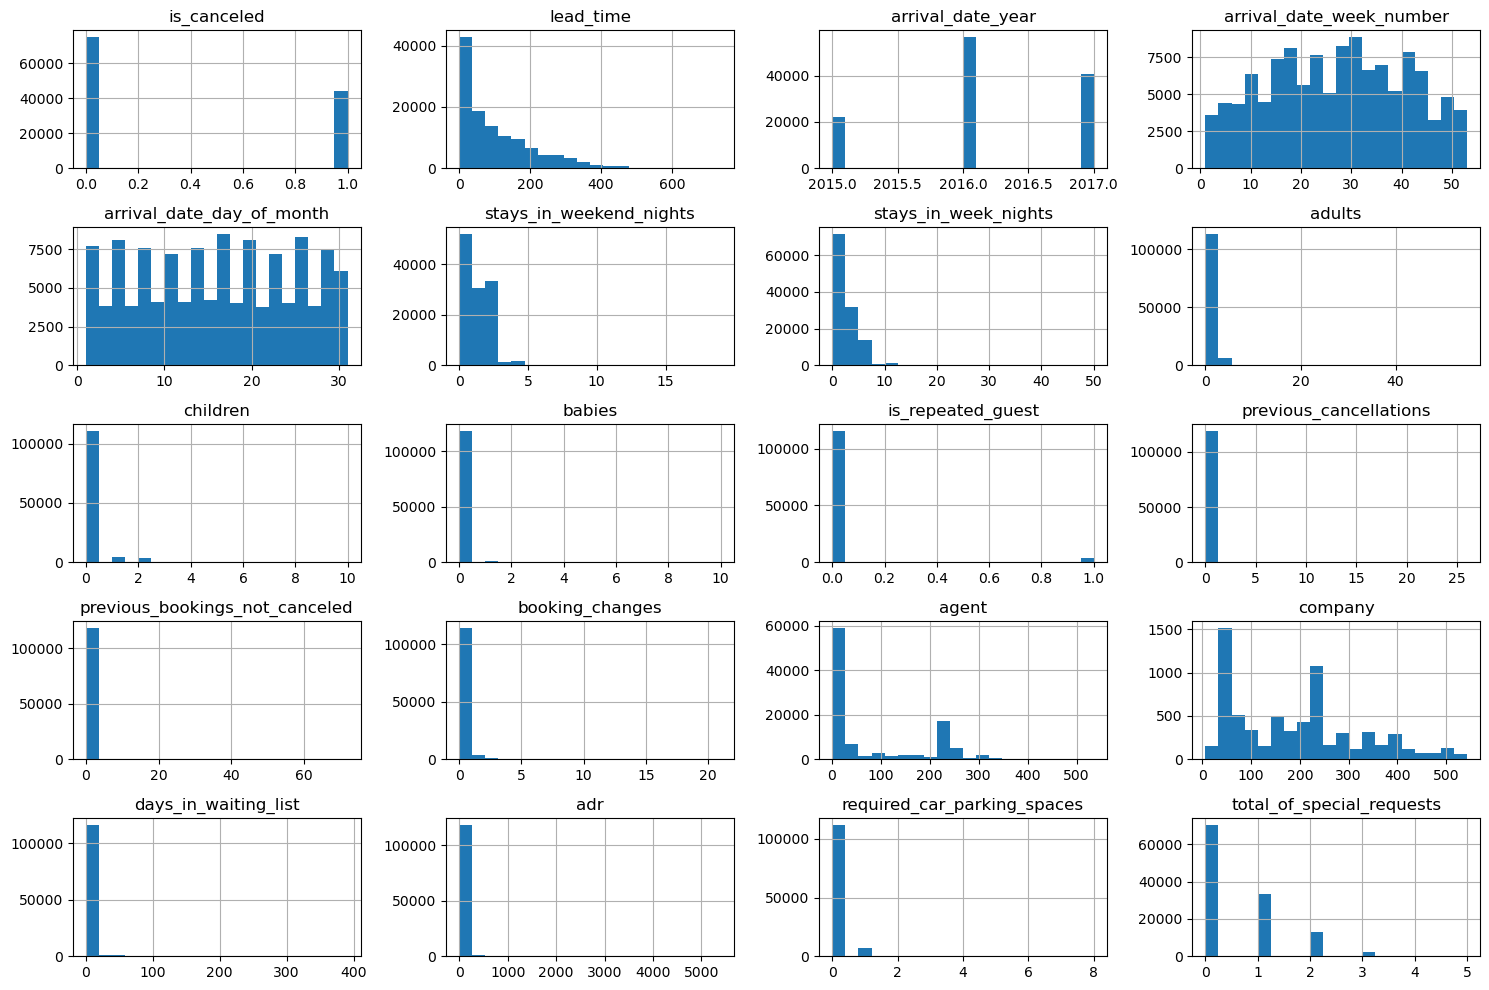

In [93]:
# ambil hanya kolom numerik
num_cols = hotels.select_dtypes(include=['int64', 'float64']).columns

hotels[num_cols].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

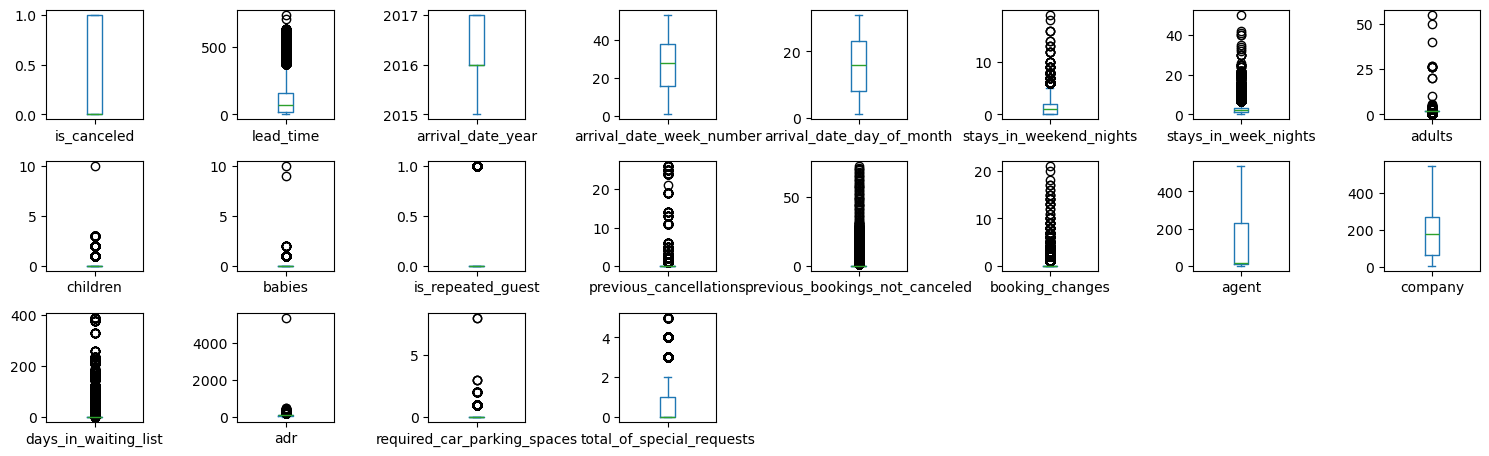

In [94]:
hotels[num_cols].plot(kind='box', subplots=True, layout=(8, 8), figsize=(15, 12), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

## **C. Data Preparation**

### **0. Checking Data types**

In [95]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Terdapat beberapa variabel dengan tipe data yang tidak tepat, namun *handling data type* akan dilakukan nanti setelah *handling missing value* untuk mengantisipasi error dan risiko kehilangan data.

###**1. Missing Value**

In [96]:
# Checking missing value tiap kolom
missing_df = (hotels.isna().sum()
              .to_frame('missing_count'))

missing_df['missing_percent'] = (missing_df['missing_count'] / len(hotels)) * 100

missing_df[missing_df['missing_count'] > 0]

,missing_count,missing_percent
children,4,0.003350
country,488,0.408744
agent,16340,13.686238
company,112593,94.306893


#### **1.1 Children**

In [97]:
# Melihat duplicates pada variabel Children
hotels[hotels['children'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,...,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,...,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


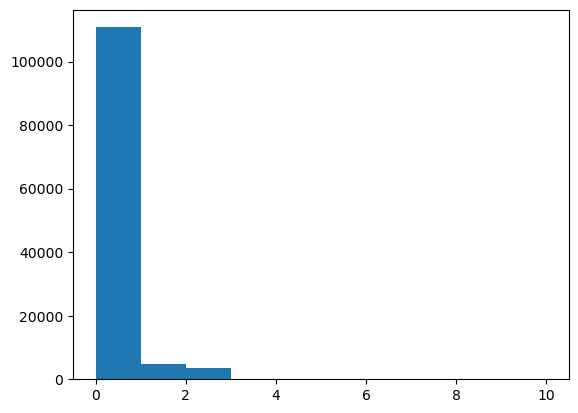

In [98]:
# Histogram children
plt.hist(hotels['children'], bins=10)

# Imputasi median karena lebih representatif, mean cenderung bias
median_children = hotels['children'].median()
hotels['children'] = hotels['children'].fillna(median_children)

Mempertimbangkan persebaran variabel ini di dataset, kami mengimputasi *missing value* dengan median agar lebih representatif. Berbeda dengan mean, menggunakan median tidak membuat data menjadi bias.


In [99]:
# Sisa missing value
missing_df = (hotels.isna().sum()
              .to_frame('missing_count'))

missing_df['missing_percent'] = (missing_df['missing_count'] / len(hotels)) * 100

missing_df[missing_df['missing_count'] > 0]

,missing_count,missing_percent
country,488,0.408744
agent,16340,13.686238
company,112593,94.306893


#### **1.2 Country**

In [100]:
# Mengubah tipe data menjadi category dan menambahkan kategori 'UNKNOWN'
hotels['country'] = hotels['country'].astype('category')
hotels['country'] = hotels['country'].cat.add_categories(['UNKNOWN'])

# Impute missing value
hotels['country'] = hotels['country'].fillna('UNKNOWN')

Diasumsikan bahwa pada pengisian data diri, customer tidak diwajibkan untuk mengisi data country. Dengan ini, kami memilih untuk melakukan imputasi dengan memberi label Unknown. Mempertimbangkan persentase *missing value* juga (0.4%), imputasi ini tidak akan mengganggu distribusi asli.

#### **1.3 Agent**

In [101]:
hotels['agent'] = hotels['agent'].fillna(0)   # 0 = no agent / direct booking

Diasumsikan bahwa customer dapat melakukan *direct booking* tanpa melalui agent, sehingga untuk *missing value* pada agent dapat diimputasi dengan '0' yang berarti *no-agent/direct booking*.

#### **1.4 Company**

In [102]:
hotels['company'] = hotels['company'].fillna('INDIVIDUAL')

Diasumsikan bahwa customer dapat melakukan pemesanan tanpa melalui suatu company, sehingga untuk missing value pada company dapat diimputasi dengan 'Individual' yang berarti customer melakukan pemesanan tanpa melibatkan suatu perusahaan.

In [103]:
# last checking / verifikasi
missing_df = (hotels.isna().sum()
              .to_frame('missing_count'))

missing_df['missing_percent'] = (missing_df['missing_count'] / len(hotels)) * 100

missing_df[missing_df['missing_count'] > 0]

,missing_count,missing_percent


### **2. Type Casting**

In [104]:
# numerik
cols_int = [
    'adults', 'children', 'babies',
    'previous_cancellations', 'previous_bookings_not_canceled',
    'booking_changes', 'agent', 'company',
    'days_in_waiting_list', 'required_car_parking_spaces',
    'total_of_special_requests']

for c in cols_int:
    hotels[c] = pd.to_numeric(hotels[c], errors='coerce').astype('Int64')


# kategorik
cols_cat = [
    'is_canceled', 'hotel', 'meal', 'country', 'market_segment',
    'distribution_channel', 'is_repeated_guest',
    'reserved_room_type', 'assigned_room_type', 'deposit_type',
    'customer_type', 'reservation_status', 'arrival_date_month'
]

for c in cols_cat:
    hotels[c] = hotels[c].astype('category')

# datetime
cols_datetime = [
    'reservation_status_date'
]

for c in cols_datetime:
    hotels[c] = pd.to_datetime(hotels[c], errors='coerce')

Memeriksa tipe data terlebih dahulu, kemudian untuk kemudahan analisis dan visualisasi, beberapa variabel diubah tipe datanya menjadi:
* **Change to Integer**

adults, children, babies, previous_cancellations, previous_bookings_not_canceled, booking_changes, agent, company, days_in_waiting_list, required_car_parking_spaces, total_of_special_requests, diubah menjadi integer.
* **Change to Category**

is_canceled, hotel, meal, country, market_segment, distribution_channel, is_repeated_guest, reserved_room_type, assigned_room_type, deposit_type, customer_type, reservation_status, arrival_date_month, diganti menjadi category.
* **Change to datetime**

reservation_status_date


### **3. Consistency Validation**

####**3.1 adults + children + babies = 0**

In [105]:
hotels = hotels[~((hotels['adults'] + hotels['children'] + hotels['babies']) == 0)]

Akan terjadi *logical inconsistency* jika ada pemesanan tanpa tamu, sehingga perlu dilakukan validasi. Checking ini menghasilnya 0 baris dengan logical inconsistency.

####**3.2 stays_in_week_nights + stays_in_weekend_nights = 0**

In [106]:
# Membuat variabel temporary untuk checking
hotels.loc[:, 'zero_night_stay'] = (hotels['stays_in_weekend_nights'] + hotels['stays_in_week_nights'] == 0)
hotels['zero_night_stay'].value_counts()

zero_night_stay
False    118565
True        645
Name: count, dtype: int64

In [107]:
# Analisis lebih lanjut mengenai cancellations
hotels.groupby(['zero_night_stay', 'is_canceled']).size()

/var/folders/dt/r1wskg594cj72tzmh8qz9b1h0000gn/T/ipykernel_53760/2997619616.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hotels.groupby(['zero_night_stay', 'is_canceled']).size()


zero_night_stay  is_canceled
False            0              74389
                 1              44176
True             0                622
                 1                 23
dtype: int64

In [108]:
hotels = hotels.drop(columns=['zero_night_stay'], errors='ignore')

Validasi ini dilakukan untuk memeriksa logical inconsistency pada lama customer menginap. stays_in_week_nights + stays_in_weekend_nights = 0 mengindikasikan bahwa customer tidak menginap.

Kemudian kami teruskan dengan cek cancellations. Jika customer tidak melakukan cancellations maka record tersebut dapat diasumsikan bahwa customer melakukan *check-in* dan *check-out* di hari yang sama.

### **4. Outlier Handling**

Dalam konteks analisis dataset ini, tidak semua variabel perlu melalui pemeriksaan outlier, karena sifat datanya berbeda-beda. Variabel yang benar-benar esensial untuk dianalisis outliernya hanyalah ADR (Average Daily Rate) dan lead_time. ADR adalah variabel finansial utama yang sangat sensitif terhadap kesalahan input; nilai yang terlalu tinggi biasanya bukan variasi alami, melainkan error seperti salah penulisan harga, kesalahan pembagian tarif, atau konversi mata uang. Outlier ADR dapat mengacaukan perhitungan pendapatan, memengaruhi analisis segmentasi, dan merusak distribusi statistik secara signifikan, sehingga wajib ditangani. Lead_time pun memiliki karakter serupa: secara logis, pemesanan hotel tidak mungkin memiliki lead time ratusan hingga ribuan hari, namun nilai seperti itu sering muncul akibat kesalahan pencatatan. Outlier lead_time dapat menyesatkan analisis perilaku pelanggan dan hubungan antara lead_time dengan cancellation.

Dengan demikian, fokus outlier hanya diarahkan pada variabel yang secara substansi berpotensi mengandung error dan dapat mengganggu interpretasi analisis.

#### **4.1. ADR**

In [109]:
# IQR
Q1 = hotels['adr'].quantile(0.25)
Q3 = hotels['adr'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

lower, upper

(np.float64(-15.25), np.float64(210.75))

In [110]:
# winsorizing
hotels['adr'] = hotels['adr'].clip(lower=lower, upper=upper)

Langkah awal menangani outlier ini adalah dengan metode IQR, nilai-nilai yang di luar batas akan ditangani dengan winsorizing. Pertimbangan kami menggunakan IQR adalah karerna metode IQR itu logis untuk dataset bisnis yang pasti kotor, skewed, dan penuh ekstrem. ADR ekstrem juga bisa merusak distribusi, tapi sifatnya masih tetap informatif.

#### **4.2 Lead_time**

IQR itu logis untuk dataset bisnis yang pasti kotor, skewed, dan penuh ekstrem.

In [111]:
# IQR
Q1 = hotels['lead_time'].quantile(0.25)
Q3 = hotels['lead_time'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR

hotels = hotels[hotels['lead_time'] <= upper].copy()

Dengan pertimbangan yang sama, outlier ini ditangani menggunakan metode IQR, kemudian menentukan batas atas yakni dengan Q3*1.5IQR (batas outlier yang tinggi). Selanjutnya kami melakukan filtering data yang berada di bawah batas atas dan hanya mengambil data tersebut.

#### **5. Duplicates**

In [112]:
# Checking jumlah duplicates
hotels.duplicated().sum()
hotels[hotels.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,<NA>,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250,<NA>,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250,<NA>,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240,<NA>,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240,<NA>,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9,<NA>,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9,<NA>,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9,<NA>,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9,<NA>,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [113]:
# dropping berdasarkan kombinasi unik untuk presisi
subset_cols = [
    'hotel', 'adults', 'children', 'babies',
    'reserved_room_type', 'assigned_room_type',
    'agent', 'company', 'country', 'adr'
]

hotels = hotels.drop_duplicates(subset=subset_cols).copy()

Setelah memeriksa jumlah baris duplikat, karena duplikat tergolong banyak, kami memutuskan untuk drop dengan menggunakan subset:
1. hotel

Booking di dua hotel berbeda tidak dapat dianggap identik walaupun atribut lainnya sama. Oleh karena itu, variabel ini wajib digunakan untuk membedakan pemesanan yang berlangsung pada properti berbeda.

2. arrival_date

Tanggal kedatangan adalah komponen utama dari informasi pemesanan. Dua pemesanan hanya dapat dikategorikan sebagai duplikat jika tanggal kedatangannya sama.

3. adults, children, babies

Ketiga variabel ini mewakili jumlah tamu dalam satu pemesanan. Komposisi tamu merupakan karakteristik penting yang secara langsung menentukan kebutuhan kamar. Pemesanan tidak dapat dianggap sama apabila jumlah tamunya berbeda.

4. reserved_room_type

Jenis kamar yang dipesan merupakan bagian dari identitas awal pemesanan. Jika dua baris berbeda dalam reserved room type, maka pemesanan tersebut tidak dapat dianggap duplikat walaupun atribut lainnya sama.

5. assigned_room_type

Jenis kamar yang diberikan pada saat check-in mungkin berubah karena ketersediaan atau kebijakan hotel (misal upgrade). Jika assigned room berbeda, kedua baris tidak dapat dikategorikan sebagai duplikat.

6. agent

Satu pemesanan tidak mungkin tercatat memiliki dua agen berbeda. Perbedaan agent mengindikasikan bahwa baris adalah dua pemesanan berbeda.

7. company

Jika company berbeda, meskipun informasi lain sama, pemesanan tidak dianggap identik. Karena itu, variabel ini penting untuk membedakan pemesanan perusahaan yang mirip.

8. country

Negara asal tamu berperan sebagai atribut identitas pelanggan. Variabel ini ditambahkan untuk memastikan bahwa dua baris yang tampak serupa tetapi berasal dari negara berbeda tidak salah dihapus sebagai duplikat.

9. adr (Average Daily Rate)

ADR mencerminkan harga per malam yang dikenakan pada pemesanan tersebut. Perbedaan ADR menunjukkan bahwa kedua baris adalah dua transaksi berbeda, sehingga variabel ini penting untuk menghindari penghapusan baris yang hanya terlihat mirip tetapi sebenarnya bukan duplikat.

10. is_canceled

Status pembatalan sangat penting untuk analisis. Dua baris dengan informasi identik tetapi memiliki status pembatalan berbeda bukanlah duplikat. Menghapus salah satunya akan menghasilkan distorsi pada analisis cancellation.

**Kesimpulan:**
Variabel-variabel tersebut dipilih karena semuanya merupakan atribut yang mendeskripsikan karakteristik utama suatu pemesanan hotel.

## **CLEANED DATASET**

In [114]:
hotels_cleaned = hotels.copy()
hotels_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54061 entries, 0 to 119388
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           54061 non-null  category      
 1   is_canceled                     54061 non-null  category      
 2   lead_time                       54061 non-null  int64         
 3   arrival_date_year               54061 non-null  int64         
 4   arrival_date_month              54061 non-null  category      
 5   arrival_date_week_number        54061 non-null  int64         
 6   arrival_date_day_of_month       54061 non-null  int64         
 7   stays_in_weekend_nights         54061 non-null  int64         
 8   stays_in_week_nights            54061 non-null  int64         
 9   adults                          54061 non-null  Int64         
 10  children                        54061 non-null  Int64         
 11  babies

### **Standardisasi dan Tranformasi**

####**Feature Construction**

**1. Menambah Kolom arrival_date**

In [115]:
# Menambah kolom arrival_date
hotels_cleaned['arrival_date'] = pd.to_datetime(
    hotels_cleaned['arrival_date_year'].astype(str) + '-' +
    hotels_cleaned['arrival_date_month'].astype(str) + '-' +
    hotels_cleaned['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d',
    errors='coerce'
)

hotels_cleaned['arrival_date'].head()

0   2015-07-01
2   2015-07-01
3   2015-07-01
4   2015-07-01
6   2015-07-01
Name: arrival_date, dtype: datetime64[ns]

**2. Menambah Kolom reservation_year, reservation_month, reservation_day**

In [116]:
# Memecah kolom reservation_status_date
hotels_cleaned['reservation_year'] = hotels_cleaned['reservation_status_date'].dt.year
hotels_cleaned['reservation_month'] = hotels_cleaned['reservation_status_date'].dt.month
hotels_cleaned['reservation_day'] = hotels_cleaned['reservation_status_date'].dt.day

hotels_cleaned[['reservation_status_date', 'reservation_year', 'reservation_month', 'reservation_day']].head()

,reservation_status_date,reservation_year,reservation_month,reservation_day
0,2015-07-01,2015,7,1
2,2015-07-02,2015,7,2
3,2015-07-02,2015,7,2
4,2015-07-03,2015,7,3
6,2015-07-03,2015,7,3


#### HOTELS CLEANED

In [117]:
hotels_cleaned = hotels.copy()
hotels_cleaned.to_csv('hotels_cleaned.csv', index=False)

## **D. Exploratory Data Analysis**

Untuk memahami dinamika operasional dan perilaku pelanggan dalam industri perhotelan, Exploratory Data Analysis (EDA) menjadi langkah awal yang sangat penting. Melalui analisis ini, kita dapat mengidentifikasi pola musiman, tren permintaan, perilaku pembatalan, hingga karakteristik harga dan segmentasi pasar. Tujuan utama analisis ini adalah memberikan insight yang mudah dipahami manajemen hotel untuk mendukung pengambilan keputusan yang lebih tepat baik untuk perencanaan kapasitas, penetapan harga, maupun strategi pemasaran.

Pada bagian pertama, analisis difokuskan pada pola musiman dan tren permintaan hotel sepanjang tahun 2015–2017.


---




### **1. Bagaimana pola musiman dan trend permintaan hotel sepanjang periode 2015–2017?**



*   Apakah terjadi perubahan tren permintaan dari tahun ke tahun?
*   Pada bulan apa permintaan hotel meningkat (peak season) atau menurun (low season)?
*   Apakah pola musiman berbeda antara resort dan city hotel?


/var/folders/dt/r1wskg594cj72tzmh8qz9b1h0000gn/T/ipykernel_53760/1068391588.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_ts = hotels_cleaned.groupby(['arrival_date','hotel']) \


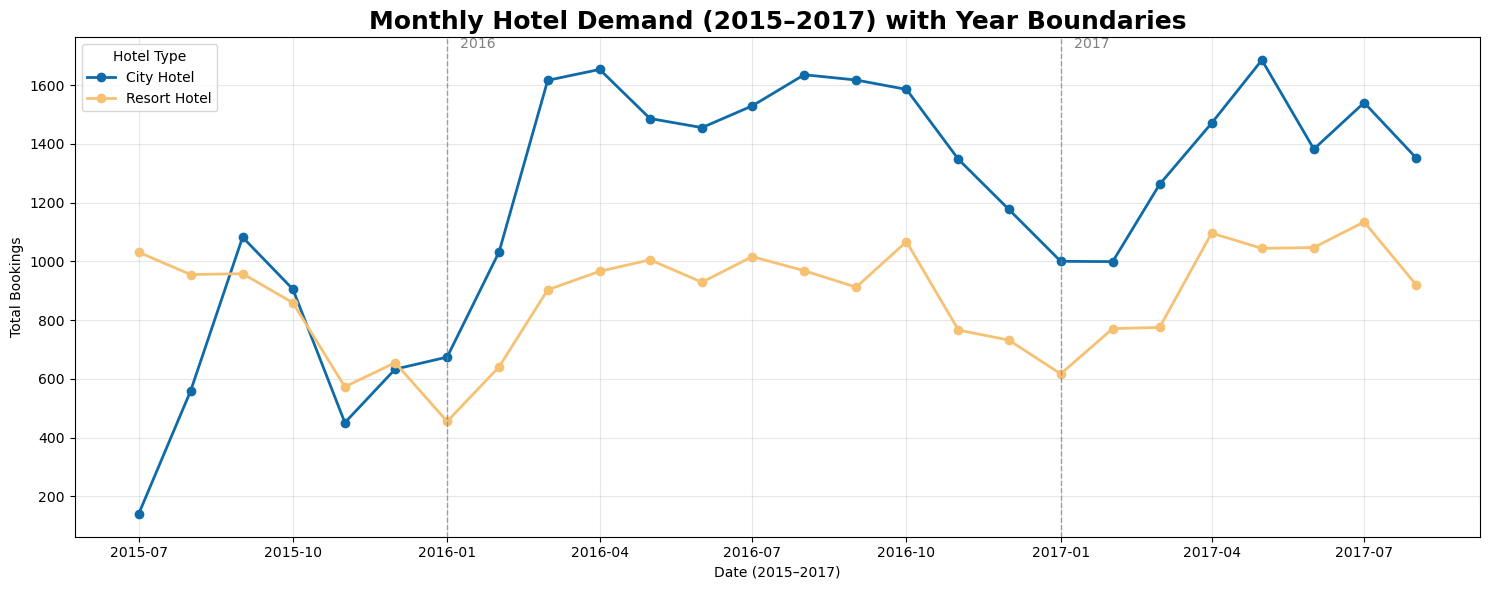

In [118]:
# --- Membuat datetime kolom seperti sebelumnya ---
hotels_cleaned['arrival_date_month'] = pd.Categorical(
    hotels_cleaned['arrival_date_month'],
    categories=[
        'January','February','March','April','May','June',
        'July','August','September','October','November','December'
    ],
    ordered=True
)

month_map = {
    'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,
    'July':7,'August':8,'September':9,'October':10,'November':11,'December':12
}
hotels_cleaned['month_num'] = hotels_cleaned['arrival_date_month'].map(month_map)

hotels_cleaned['arrival_date'] = pd.to_datetime({
    'year': hotels_cleaned['arrival_date_year'],
    'month': hotels_cleaned['month_num'],
    'day': 1
})

monthly_ts = hotels_cleaned.groupby(['arrival_date','hotel']) \
    .size().reset_index(name='total_bookings')

# Colors
palette_ts = {
    "City Hotel": "#0E6BA8",
    "Resort Hotel": "#f7c174"
}

# Plot
plt.figure(figsize=(15,6))

for hotel_type in monthly_ts['hotel'].unique():
    subset = monthly_ts[monthly_ts['hotel'] == hotel_type]
    plt.plot(
        subset['arrival_date'],
        subset['total_bookings'],
        marker='o',
        linewidth=2,
        label=hotel_type,
        color=palette_ts[hotel_type]
    )

# garis batas antar tahun
year_boundaries = ['2016-01-01', '2017-01-01']
for y in year_boundaries:
    plt.axvline(
        pd.to_datetime(y),
        color='gray',
        linestyle='--',
        linewidth=1,
        alpha=0.7
    )
    plt.text(
        pd.to_datetime(y),
        plt.gca().get_ylim()[1],
        f"   {y[:4]}",
        color='gray',
        va='top',
        fontsize=10
    )

plt.title("Monthly Hotel Demand (2015–2017) with Year Boundaries",
          fontsize=18, weight='semibold')
plt.xlabel("Date (2015–2017)")
plt.ylabel("Total Bookings")
plt.grid(alpha=0.3)
plt.legend(title="Hotel Type")
plt.tight_layout()
plt.show()


Hasil visualisasi menunjukkan bahwa
* permintaan hotel secara keseluruhan
meningkat dari tahun 2015 ke 2016, kemudian cenderung stabil atau sedikit menurun pada 2017.

* Jika dilihat berdasarkan pola musiman, baik City Hotel maupun Resort Hotel memiliki titik puncak permintaan (peak season) pada bulan Juli–Agustus yang bertepatan dengan summer holiday, serta pada bulan Desember saat libur akhir tahun. Sebaliknya, permintaan pada kedua jenis hotel mencapai titik terendah (low season) pada Januari–Februari dan November, yaitu periode setelah liburan ketika intensitas perjalanan biasanya turun.

* Resort Hotel menunjukkan fluktuasi musiman yang jauh lebih jelas permintaan meningkat tajam di bulan liburan dan turun drastis pada low season. Sementara itu, City Hotel memiliki pola yang lebih stabil, karena sebagian besar tamunya adalah pelaku perjalanan bisnis yang datang sepanjang tahun tanpa mengikuti musim tertentu. Pola ini menegaskan bahwa faktor musim memiliki pengaruh lebih kuat terhadap resort dibandingkan city hotel.








> Setelah mengetahui kapan permintaan hotel berada pada titik tinggi dan rendah, selanjutnya adalah menganalisis faktor penyebab pembatalan. Hal ini penting karena dampak cancellation sangat dipengaruhi oleh musim: pembatalan pada high season berpotensi menimbulkan kerugian yang lebih besar dibandingkan low season. Oleh karena itu, memahami pola musiman terlebih dahulu membuat analisis cancellation menjadi lebih relevan dan terarah.
---

### **2.   Faktor apa saja yang mempengaruhi pembatalan pemesanan hotel?**








*   Variabel mana yang paling dominan berkontribusi pada cancellation?



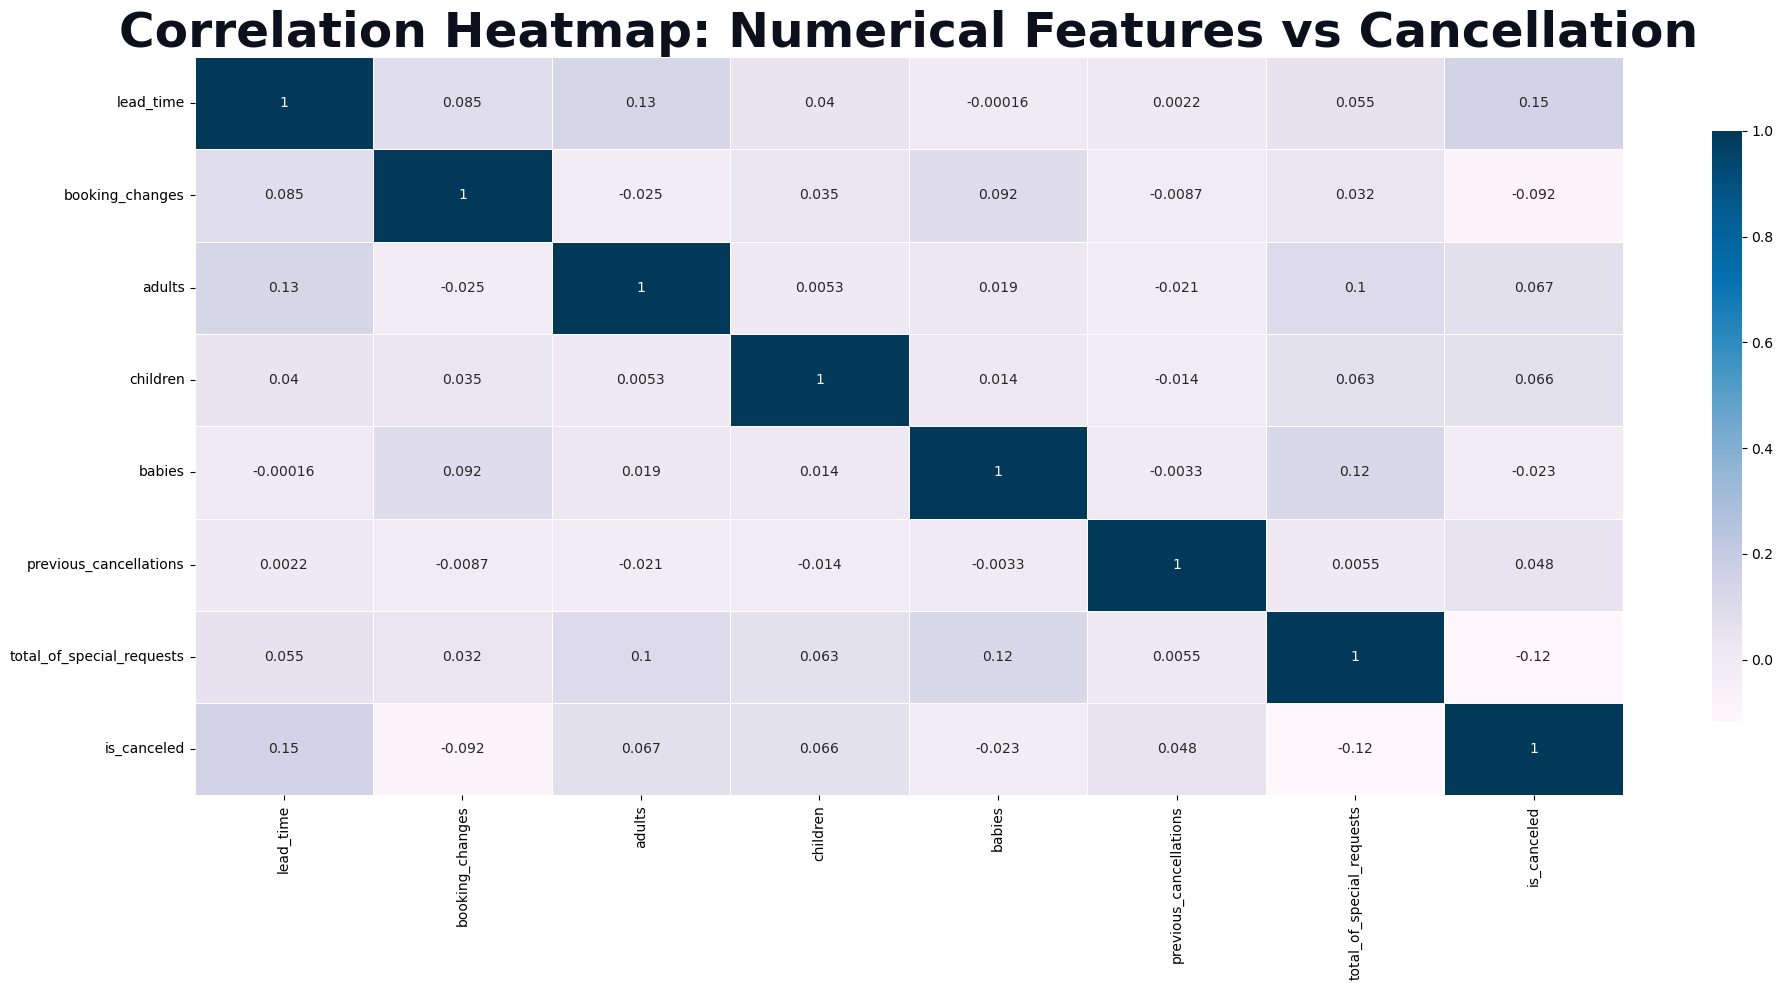

In [119]:
numerical = [
    'lead_time','booking_changes','adults','children','babies',
    'previous_cancellations','total_of_special_requests'
]

plt.figure(figsize=(20,10))

sns.heatmap(
    hotels_cleaned[numerical + ['is_canceled']].corr(),
    annot=True,
    cmap='PuBu',              # soft pastel-ish gradient (tidak norak)
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap: Numerical Features vs Cancellation",
          color="#0d0f1c",
          fontsize=35,
          weight='semibold')
plt.tight_layout()
plt.show()



---


Untuk memahami mengapa lead_time muncul sebagai variabel paling dominan dalam model, analisis korelasi atau scatter plot dilakukan pada langkah ini untuk melihat apakah terdapat pola hubungan langsung antara lamanya waktu pemesanan dan kemungkinan pembatalan.

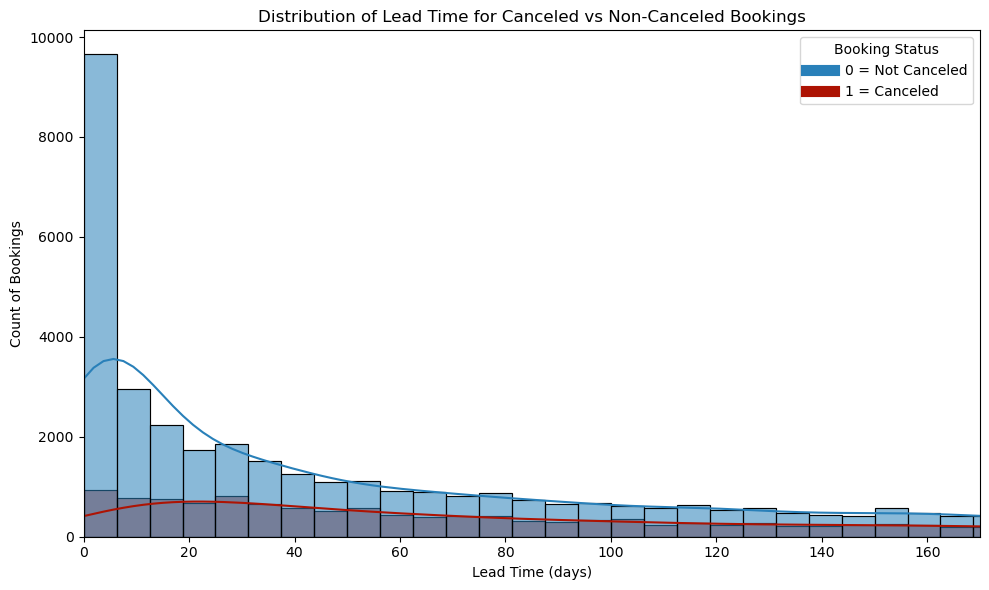

In [120]:
plt.figure(figsize=(10,6))

ax = sns.histplot(
    data=hotels_cleaned,
    x='lead_time',
    hue='is_canceled',
    hue_order=[0,1],
    kde=True,
    bins=60,
    alpha=0.55,
    palette={0: '#2980B9', 1: '#ad1303'}
)

ax.set_xlim(0, hotels_cleaned['lead_time'].quantile(0.98))
ax.set_xlabel("Lead Time (days)")
ax.set_ylabel("Count of Bookings")
ax.set_title("Distribution of Lead Time for Canceled vs Non-Canceled Bookings")

custom_lines = [
    Line2D([0], [0], color='#2980B9', lw=8, label='0 = Not Canceled'),
    Line2D([0], [0], color='#ad1303', lw=8, label='1 = Canceled')
]

ax.legend(
    handles=custom_lines,
    title="Booking Status",
    loc='upper right'
)

plt.tight_layout()
plt.xlim(0, 170)
plt.show()




Grafik menunjukkan bahwa distribusi lead_time untuk booking yang dibatalkan (1) memiliki kecenderungan lebih tinggi pada nilai lead_time yang panjang. Artinya, semakin jauh jarak waktu antara tanggal pemesanan dan tanggal kedatangan, semakin besar kemungkinan pemesanan tersebut dibatalkan. Sebaliknya, booking dengan lead_time pendek lebih banyak berasal dari pelanggan yang tidak membatalkan (0), karena mereka biasanya melakukan pemesanan untuk kebutuhan yang lebih mendesak atau perjalanan yang sudah pasti terjadi. Pola ini terlihat jelas pada bagian ekor distribusi, di mana proporsi pemesanan yang dibatalkan cenderung lebih besar dibandingkan pemesanan yang tidak dibatalkan.



> Setelah memahami faktor-faktor yang mempengaruhi pembatalan dan bagaimana hal tersebut berdampak pada pendapatan hotel, analisis selanjutnya difokuskan pada harga. Average Daily Rate (ADR) merupakan indikator utama dalam manajemen pendapatan (revenue management). Dengan melihat pola ADR berdasarkan jenis hotel dan musim, hotel dapat mengoptimalkan strategi penetapan harga agar lebih kompetitif sekaligus menguntungkan.


---





### **3. Analisis Harga (ADR)**




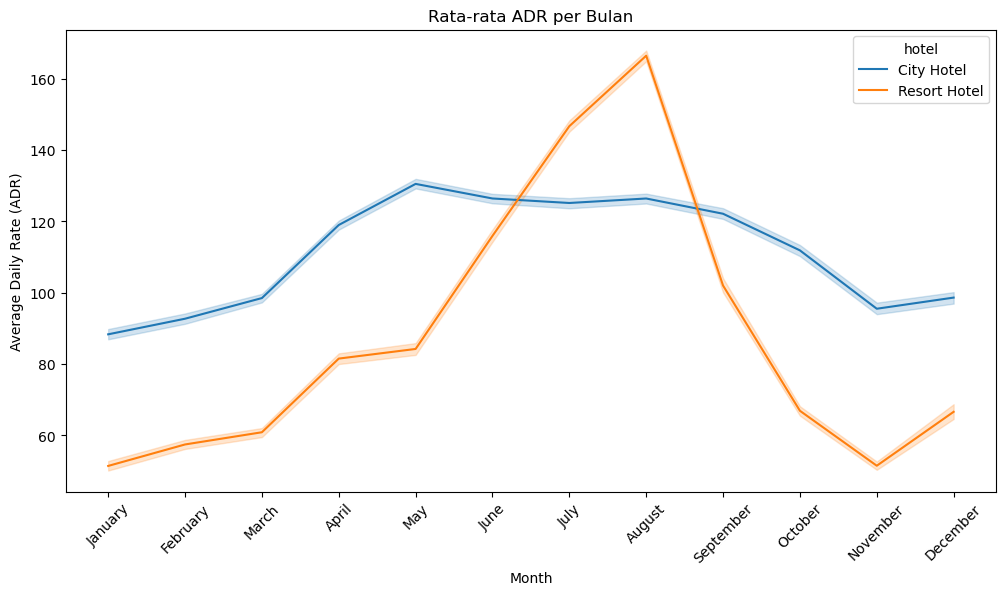

In [121]:
hotels_cleaned['arrival_date_month'] = pd.Categorical(
    hotels_cleaned['arrival_date_month'],
    categories=[
        'January','February','March','April','May','June',
        'July','August','September','October','November','December'
    ],
    ordered=True
)

plt.figure(figsize=(12,6))
sns.lineplot(data=hotels_cleaned,
             x='arrival_date_month',
             y='adr',
             hue = 'hotel',
             estimator='mean')
plt.xticks(rotation=45)
plt.title("Rata-rata ADR per Bulan")
plt.ylabel("Average Daily Rate (ADR)")
plt.xlabel("Month")
plt.show()

Secara keseluruhan, grafik tersebut menunjukkan bahwa Resort Hotel sangat bergantung pada permintaan musiman, sedangkan City Hotel lebih konstan dan tidak terlalu dipengaruhi oleh pola liburan. Dengan begitu, strategi penetapan harga kedua jenis hotel harus berbeda: Resort Hotel perlu agresif dalam high-season pricing saat permintaan memuncak, sementara City Hotel dapat menjaga harga yang lebih stabil sepanjang tahun.

> Selanjutnya melihat siapa yang sebenarnya memesan kamar dan melalui channel apa mereka melakukan pemesanan. Analisis market segment dan distribution channel membantu hotel mengidentifikasi sumber pendapatan utama serta menilai efektivitas channel pemasaran.





---

### **4. Analisis Market Segment & Distribution Channel**


**MARKET SEGMENT**

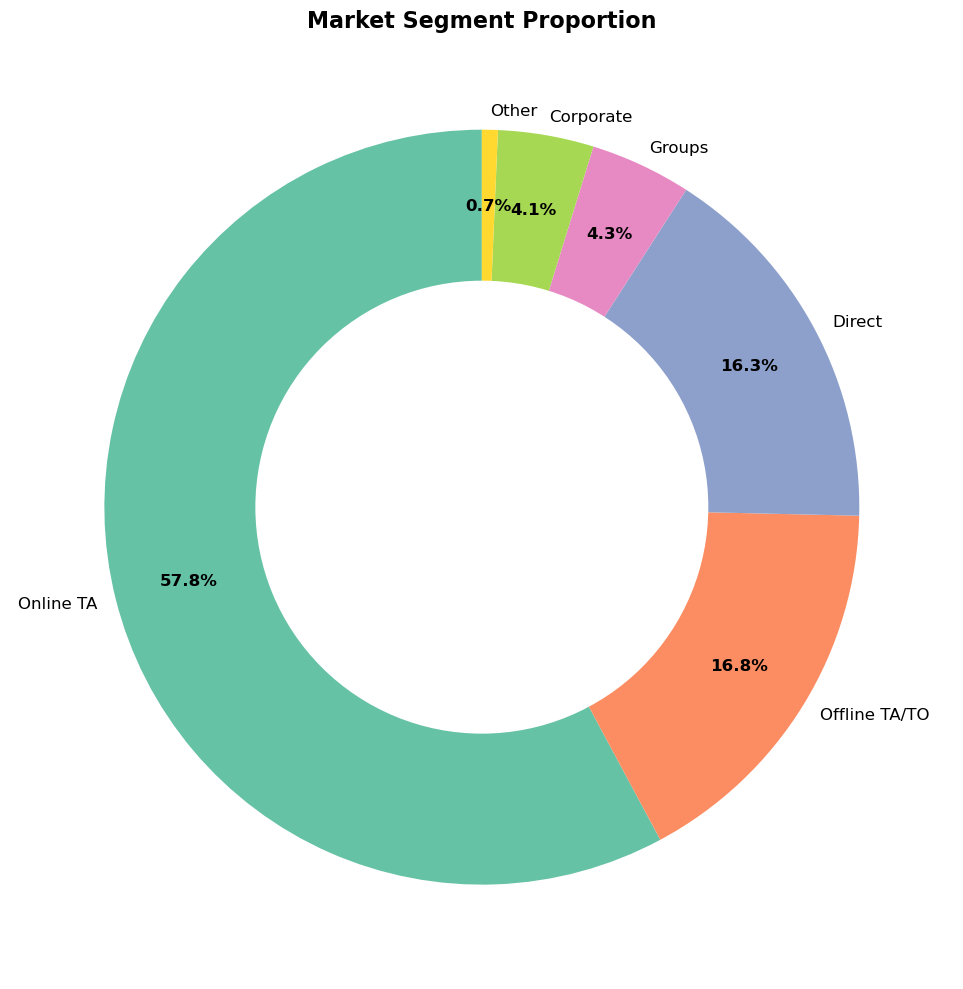

In [122]:
# Hitung proporsi
segment_counts = hotels_cleaned['market_segment'].value_counts()
segment_pct = segment_counts / segment_counts.sum()

# Tentukan batas (misal < 3%)
threshold = 0.03

# Pisahkan major dan minor categories
major_segments = segment_pct[segment_pct >= threshold]
minor_segments = segment_pct[segment_pct < threshold]

# Gabungkan minor jadi "Other"
if len(minor_segments) > 0:
    combined_series = major_segments.copy()
    combined_series["Other"] = minor_segments.sum()
else:
    combined_series = major_segments

# Plot
plt.figure(figsize=(10,10))
colors = sns.color_palette("Set2", n_colors=len(combined_series))

wedges, texts, autotexts = plt.pie(
    combined_series,
    labels=combined_series.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    pctdistance=0.80,
    labeldistance=1.05
)

# Style
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color("black")
    autotext.set_fontweight("semibold")

# Buat donut
centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Market Segment Proportion", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


Mayoritas booking berasal dari Online TA (57.8%), menjadikannya segmen pelanggan terbesar dan paling dominan. Segmen Offline TA/TO dan Direct booking berada di posisi kedua dengan kontribusi sekitar 16–17%, sementara Corporate dan Groups hanya menyumbang sebagian kecil dari total booking. Ini menunjukkan bahwa hotel sangat bergantung pada OTA sebagai sumber permintaan utama, sementara segmen lain tetap penting untuk variasi tamu dan stabilitas pendapatan.

/var/folders/dt/r1wskg594cj72tzmh8qz9b1h0000gn/T/ipykernel_53760/768891261.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hotels_cleaned.groupby("distribution_channel")["adr"]
/var/folders/dt/r1wskg594cj72tzmh8qz9b1h0000gn/T/ipykernel_53760/768891261.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


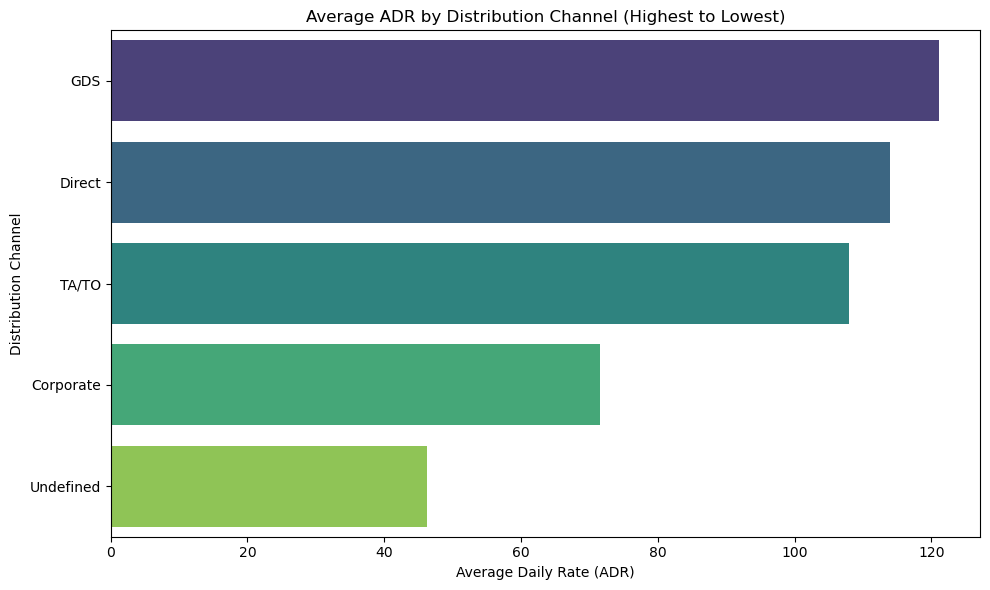

In [123]:
channel_adr = (
    hotels_cleaned.groupby("distribution_channel")["adr"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(
    x=channel_adr.values,
    y=channel_adr.index,
    order=channel_adr.index,
    palette="viridis"
)

plt.title("Average ADR by Distribution Channel (Highest to Lowest)")
plt.xlabel("Average Daily Rate (ADR)")
plt.ylabel("Distribution Channel")
plt.tight_layout()
plt.show()

ADR tertinggi diperoleh melalui GDS dan Direct booking, menjadikan kedua channel ini sebagai sumber pendapatan per malam yang paling menguntungkan. TA/TO berada di posisi menengah, sedangkan Corporate dan terutama Undefined memiliki ADR rendah. Hal ini menunjukkan bahwa, meskipun volume booking mungkin lebih besar dari channel lain, hotel perlu memprioritaskan channel dengan ADR tinggi untuk memaksimalkan profitabilitas.

### **2 Tabel Ringkasan**





In [124]:
hotels_cleaned['company'].unique()

<IntegerArray>
[<NA>,  110,  113,  270,  178,  240,  154,  144,  307,  268,
 ...
  446,  357,  479,  483,  489,  229,  481,  497,  451,  492]
Length: 349, dtype: Int64

1. Tabel Ringkasan Statistik untuk Variabel Numerik

In [125]:
hotels_cleaned.describe(include=[float, int]).T

,count,mean,std,min,25%,50%,75%,max
lead_time,54061.0,75.611938,80.038108,0.0,11.0,46.0,119.0,375.0
arrival_date_year,54061.0,2016.171898,0.684071,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,54061.0,27.105473,13.594876,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,54061.0,15.868371,8.923087,1.0,8.0,16.0,24.0,31.0
stays_in_weekend_nights,54061.0,1.072918,1.066964,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,54061.0,2.783337,2.167715,0.0,1.0,2.0,4.0,50.0
adults,54061.0,1.879506,0.655452,0.0,2.0,2.0,2.0,55.0
children,54061.0,0.16511,0.484389,0.0,0.0,0.0,0.0,10.0
babies,54061.0,0.016518,0.140572,0.0,0.0,0.0,0.0,10.0
previous_cancellations,54061.0,0.018091,0.28653,0.0,0.0,0.0,0.0,25.0


2. Tabel Ringkasan Jumlah Booking per Bulan

In [126]:
hotels_cleaned['arrival_date_month'] = pd.Categorical(
    hotels_cleaned['arrival_date_month'],
    categories=[
        'January','February','March','April','May','June',
        'July','August','September','October','November','December'
    ],
    ordered=True
)

tabel_jumlah_bulanan = hotels_cleaned['arrival_date_month'].value_counts().sort_index()
tabel_jumlah_bulanan


arrival_date_month
January      2746
February     3443
March        4556
April        5185
May          5220
June         4813
July         6390
August       6389
September    4569
October      4416
November     3137
December     3197
Name: count, dtype: int64

## **E. Ringkasan & Kesimpulan**

#### **1. Temuan Utama**

Analisis tren pemesanan menunjukkan bahwa permintaan hotel meningkat dari tahun 2015 ke 2016 sebelum stabil atau sedikit menurun pada 2017. Pola musiman terlihat jelas, dengan peningkatan permintaan pada Juli - Agustus saat libur musim panas dan Desember saat libur akhir tahun, serta penurunan pada Januari - Februari dan November. Resort Hotel memperlihatkan fluktuasi musiman yang lebih tajam dibandingkan City Hotel, menandakan ketergantungan yang kuat terhadap periode liburan, sedangkan City Hotel menunjukkan stabilitas yang lebih baik sepanjang tahun karena didominasi tamu bisnis. Selain itu, distribusi lead time memperlihatkan bahwa pemesanan dengan lead time panjang lebih sering dibatalkan, menunjukkan bahwa semakin jauh jarak waktu antara pemesanan dan kedatangan, semakin tinggi risiko pembatalannya. Dari sisi market segment, mayoritas pemesanan berasal dari Online Travel Agencies (OTA), menunjukkan dominasi platform digital dalam perilaku pemesanan tamu. Channel seperti Direct dan GDS memberikan ADR tertinggi, sehingga berpotensi menjadi sumber pendapatan paling menguntungkan bagi hotel.


#### **2. Keterbatasan**

Analisis ini masih bergantung pada pola historis tiga tahun sehingga sensitivitas terhadap perubahan tren yang lebih baru belum terlihat. Data tidak mencakup faktor eksternal seperti kondisi ekonomi, kompetitor, kebijakan perjalanan, atau promosi, yang dapat memengaruhi permintaan dan pembatalan. Distribusi channel dan ADR juga belum mempertimbangkan biaya komisi masing-masing channel, sehingga profitabilitas sebenarnya tidak dapat dihitung secara akurat.


#### **3. Saran Pengembangan**

Berdasarkan hasil analisis, hotel dapat meningkatkan kinerja bisnis dengan menyesuaikan strategi penjualan dan harga sesuai karakter setiap jenis hotel. Resort Hotel yang sangat bergantung pada musim liburan perlu menaikkan harga dan menawarkan paket premium saat permintaan tinggi, serta memberikan promo menarik pada periode sepi. Sementara itu, City Hotel sebaiknya memperkuat kerja sama dengan perusahaan dan menawarkan keuntungan khusus untuk tamu bisnis agar tetap stabil sepanjang tahun. Karena banyak tamu memesan melalui situs online, hotel perlu tetap hadir di platform tersebut tetapi juga mendorong lebih banyak pemesanan langsung melalui keuntungan eksklusif. Tingginya pembatalan pada pemesanan jauh hari juga menjadi alasan bagi hotel untuk membuat aturan yang lebih tegas atau memberikan pilihan harga yang berbeda agar risiko kerugian bisa ditekan.
